# Step - 1: Business Problem Understanding
- Indentify relationship between total advertising spend and sales?
- Our next ad campaign will have a total spend of $200,000. how many units do we expect to sell as a result of this?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step - 2: Data Understanding

## 2.1: Data Collection

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


- If someone was to spend a total of $200,000, what would be the expexted sales be?
- We have simplified this quite a bit by combining all the features into 'total spend'

In [4]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [5]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


# Step - 3: Data Preprocessing

## 3.1: Exploratory Data Analysis(EDA)

- On the basis of this data, how should you spend advertising money in the future? These general questions might lead you to more specific questions:
    1. Is there a relationship between ads and sales?
    2. How strong is that relationship?
    3. Given ad spending, can sales be predicted?

In [6]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


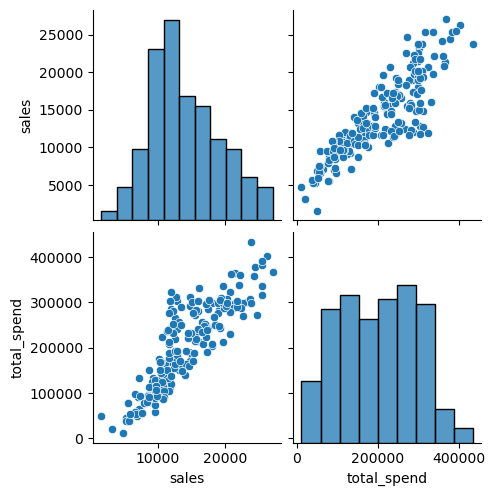

In [7]:
sns.pairplot(df)
plt.show()

What to identify from scatter plot 
- Linearity
- Direction
- Strength

In [8]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


- The higher the Correlation, higher the accuracy in the result

## 3.2: Data Cleaning

In [9]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

## 3.3: Data Wrangling

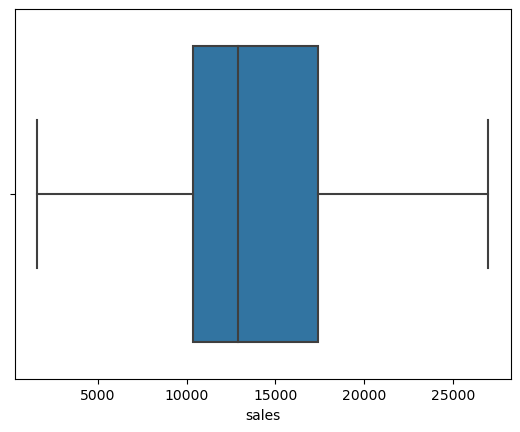

In [10]:
sns.boxplot(x=df['sales'])
plt.show()

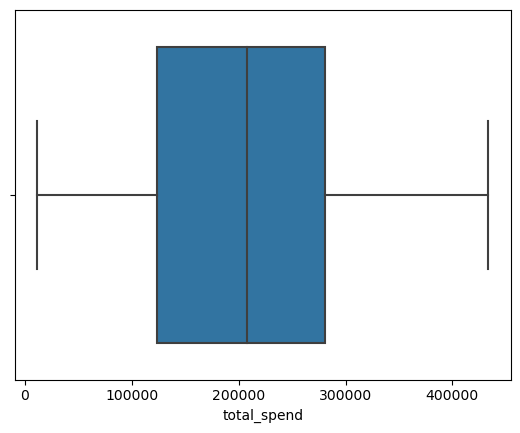

In [11]:
sns.boxplot(x=df['total_spend'])
plt.show()

- no encoding is required

## 3.4: Train-Test Split

In [12]:
X=df.drop(columns='sales')
y=df['sales']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train

,total_spend
79,146800
197,192700
38,104900
24,93200
122,242000
...,...
106,65700
14,283000
92,310200
179,193200


# Step 4: Modelling

Modelling with default parameters

In [15]:
# Import the model
from sklearn.linear_model import LinearRegression

In [16]:
# Save the model
model=LinearRegression()

In [17]:
# Fit the model
model.fit(X_train,y_train)

LinearRegression()

In [18]:
model.intercept_

4169.512013489044

In [19]:
model.coef_

array([0.0489571])

# Step 5: Predictions

In [20]:
train_predictions=model.predict(X_train)

In [21]:
test_predictions=model.predict(X_test)

# Step 5: Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error
print('MAE for test data: ',mean_absolute_error(y_test,test_predictions))
print('MAE for train data: ',mean_absolute_error(y_train,train_predictions))

MAE for test data:  2088.4273558466143
MAE for train data:  1917.5145382145042


In [23]:
from sklearn.metrics import mean_squared_error
print('MSE for test data: ',mean_squared_error(y_test,test_predictions))
print('MSE for train data: ',mean_squared_error(y_train,train_predictions))

MSE for test data:  7779806.406885764
MSE for train data:  6421575.106597045


In [24]:
print('RMSE for test data: ',np.sqrt(mean_squared_error(y_test,test_predictions)))
print('RMSE for train data: ',np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE for test data:  2789.230432733331
RMSE for train data:  2534.0826952956854


In [25]:
from sklearn.metrics import r2_score
print('R2 for test data: ',r2_score(y_test,test_predictions))
print('R2 for train data: ',r2_score(y_train,train_predictions))

R2 for test data:  0.7535196255373878
R2 for train data:  0.7524092686260718


In [26]:
model.score(X_test,y_test)

0.7535196255373878

In [27]:
model.score(X_train,y_train)

0.7524092686260718

# Checklist

- For any Supervised Machine Learning Algorithm (Other than Linear Regression)
    1. Check whether model has overfitting or underfitting problem
    2. Is Test Accuracy = Cross validation Score
    4. Check model meets the business problem requirements
    5. Finally, save the model and share to the deployment team

- For Linear Regression, in addition we have to
    - Check Assumptions (if it is Linear Regression)

1. Is model has underfiting or overfitting problem?
Answer: It's a good model.
2. Is Test Accuracy = Cross validation Score

In [28]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)

cv_score=scores.mean()
print('Cross Validation Score: ', cv_score)

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross Validation Score:  0.7433783178555419


# Check for assumptions

1. Linearity of Errors

In [29]:
test_res=y_test-test_predictions

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlablel'

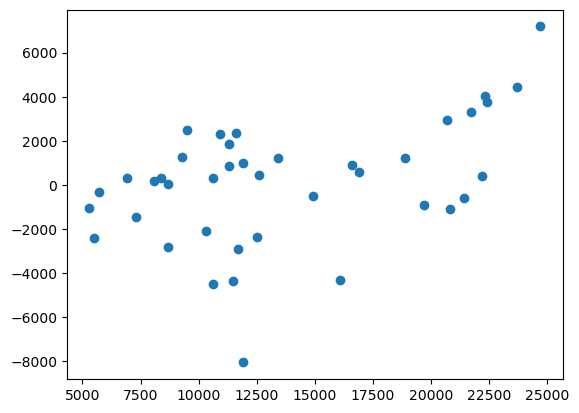

In [30]:
plt.scatter(y_test,test_res)
plt.xlablel('observed_values')
plt.ylablel('fitted_values')
plt.show()

2. Normality of Errors

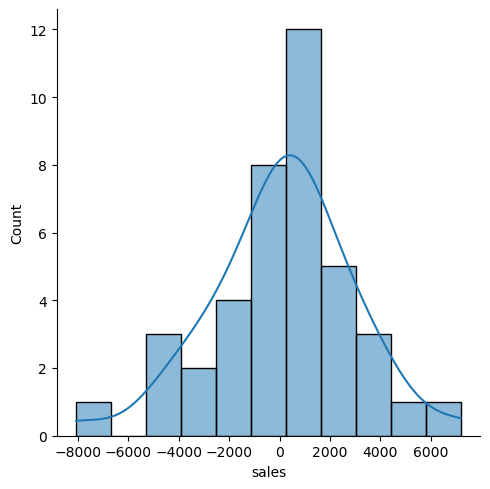

In [31]:
sns.displot(test_res,kde=True)
plt.show()

3. Equal Varience of Errors(Homoscadesicity)

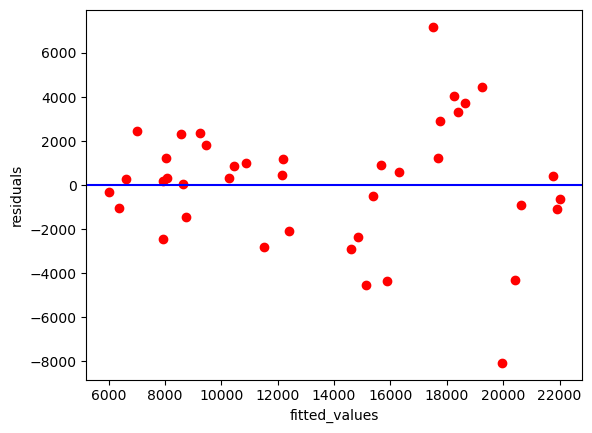

In [32]:
plt.scatter(test_predictions,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

4. Variables Significance

In [33]:
import statsmodels.formula.api as smf
model2=smf.ols('y~X',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           5.06e-62
Time:                        15:39:59   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Step 6: Final Inferences
Our next ad campaign will have a total spend of 200k on Ads, how many units could we expect to sell as a result of this?

In [34]:
model.predict([[321400]])

/Users/ayeshanausheen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19904.32272443])

# Save the model

In [35]:
from joblib import dump

In [36]:
dump(model, 'sales_model.joblib')

['sales_model.joblib']

# Load the Model

In [37]:
from joblib import load

In [38]:
loaded_model=load('sales_model.joblib')

In [39]:
loaded_model.predict([[200000]])

/Users/ayeshanausheen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13960.93124868])